In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
path = r"D:\Percia_MTech\GUVI\python\Projects\bank_deposit\data\train.csv"
df = pd.read_csv(path,low_memory=False)
df

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,29,services,single,secondary,no,1282,no,yes,unknown,4,jul,1006,2,-1,0,unknown,1
749996,749996,69,retired,divorced,tertiary,no,631,no,no,cellular,19,aug,87,1,-1,0,unknown,0
749997,749997,50,blue-collar,married,secondary,no,217,yes,no,cellular,17,apr,113,1,-1,0,unknown,0
749998,749998,32,technician,married,secondary,no,-274,no,no,cellular,26,aug,108,6,-1,0,unknown,0


In [5]:
# Displays column names, data types, and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         750000 non-null  int64 
 1   age        750000 non-null  int64 
 2   job        750000 non-null  object
 3   marital    750000 non-null  object
 4   education  750000 non-null  object
 5   default    750000 non-null  object
 6   balance    750000 non-null  int64 
 7   housing    750000 non-null  object
 8   loan       750000 non-null  object
 9   contact    750000 non-null  object
 10  day        750000 non-null  int64 
 11  month      750000 non-null  object
 12  duration   750000 non-null  int64 
 13  campaign   750000 non-null  int64 
 14  pdays      750000 non-null  int64 
 15  previous   750000 non-null  int64 
 16  poutcome   750000 non-null  object
 17  y          750000 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 103.0+ MB


In [6]:
# shows the number of rows and columns in the DataFrame
df.shape

(750000, 18)

In [8]:
# check missing values
df.isnull().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
# check duplicate records
df.duplicated().sum()

np.int64(0)

In [10]:
# descriptive statistics of DataFrame 
df.describe()

,id,age,balance,day,duration,campaign,pdays,previous,y
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,40.926395,1204.067397,16.117209,256.229144,2.577008,22.412733,0.298545,0.120651
std,216506.495284,10.098829,2836.096759,8.250832,272.555662,2.718514,77.319998,1.335926,0.325721
min,0.000000,18.000000,-8019.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,187499.750000,33.000000,0.000000,9.000000,91.000000,1.000000,-1.000000,0.000000,0.000000
50%,374999.500000,39.000000,634.000000,17.000000,133.000000,2.000000,-1.000000,0.000000,0.000000
75%,562499.250000,48.000000,1390.000000,21.000000,361.000000,3.000000,-1.000000,0.000000,0.000000
max,749999.000000,95.000000,99717.000000,31.000000,4918.000000,63.000000,871.000000,200.000000,1.000000


In [17]:
df.columns

Index(['id', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [16]:
# clean spaces, convert to lowercase, replace 'nan' or 'None' with 'Missing'
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
for c in cat_cols:
    df[c] = df[c].astype(str).str.strip().str.lower().replace({'nan':'missing','none':'missing'})


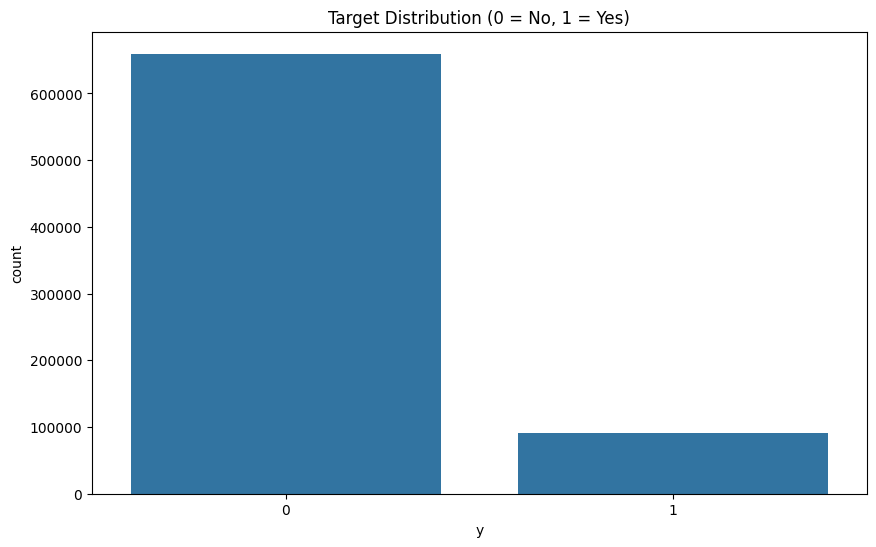

In [22]:
# Distribution of target variable y
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='y')
plt.title('Target Distribution (0 = No, 1 = Yes)')
plt.show()

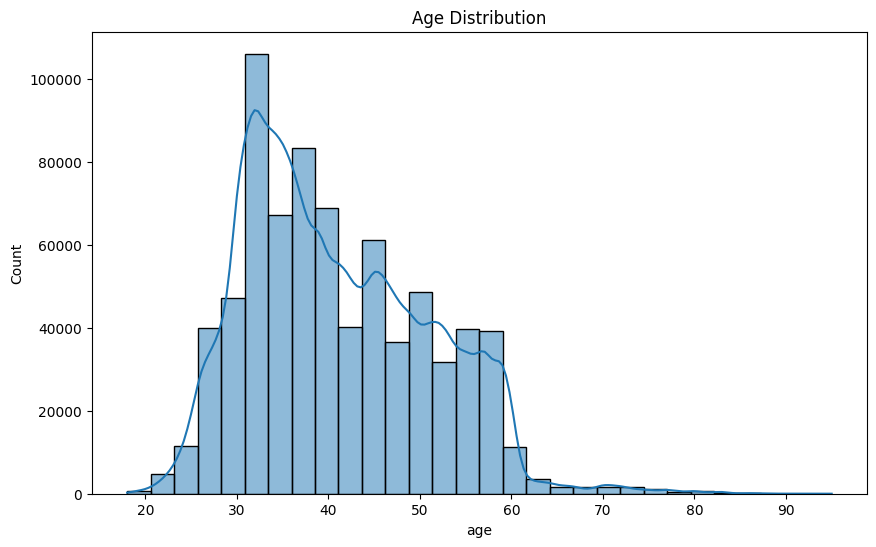

In [23]:
# Numerical feature example: age distribution
plt.figure(figsize=(10,6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

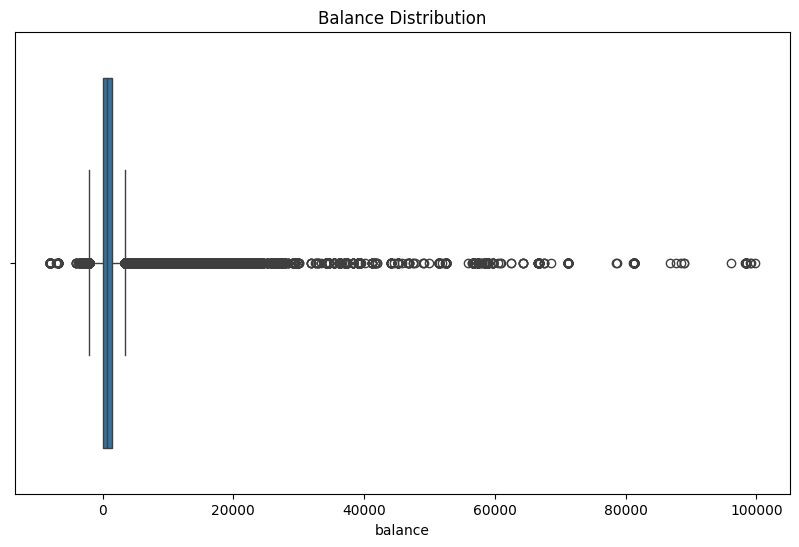

In [25]:
# Boxplot for balance (detect outliers)
plt.figure(figsize=(10,6))
sns.boxplot(x=df['balance'])
plt.title('Balance Distribution')
plt.show()

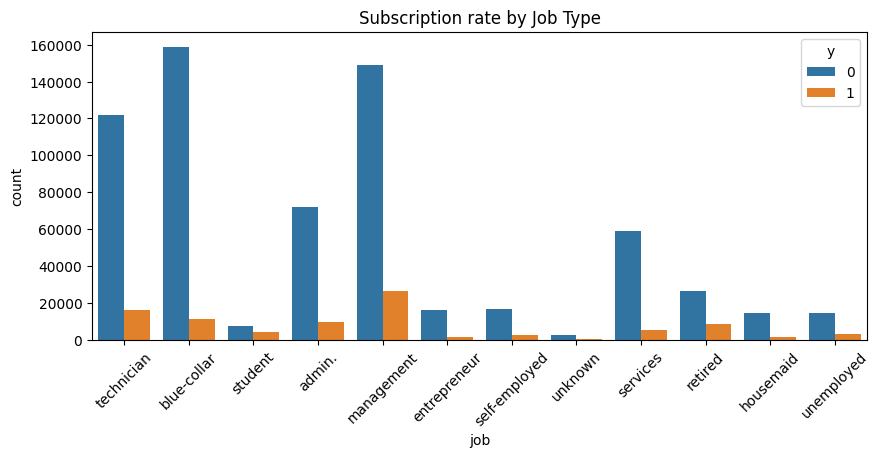

In [26]:
# Relationship between job and subscription
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='job', hue='y')
plt.xticks(rotation=45)
plt.title('Subscription rate by Job Type')
plt.show()

In [12]:
df['gender'] = df['gender'].map({
    'm': 'Male',
    'male': 'Male',
    'f': 'Female',
    'female': 'Female'
})

In [13]:
df['existing_loans'] 

0         yes
1         yes
2          no
3          no
4          no
         ... 
404795     no
404796     no
404797     no
404798     no
404799     no
Name: existing_loans, Length: 404800, dtype: object

In [14]:
# convert binary flags into numeric
df['existing_loans'] = df['existing_loans'].map({'yes': 1, 'no': 0})


In [22]:
df.to_csv('D:\Percia_MTech\GUVI\python\Projects\emi_prediction\data\processed\emi_cleaned.csv', index=False)

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Satheesh\AppData\Local\Temp\ipykernel_20264\3905804642.py:1: SyntaxWarning: invalid escape sequence '\P'
  df.to_csv('D:\Percia_MTech\GUVI\python\Projects\emi_prediction\data\processed\emi_cleaned.csv', index=False)


In [27]:
from sklearn.model_selection import train_test_split

# Step 1: Split into Train (70%) and Temp (30%)
train, temp = train_test_split(df, test_size=0.30, random_state=42)

# Step 2: Split Temp into Validation (15%) and Test (15%)
val, test = train_test_split(temp, test_size=0.50, random_state=42)

# Step 3: Save the splits
train.to_csv('D:\Percia_MTech\GUVI\python\Projects\emi_prediction\data\splits\emi_train.csv', index=False)
val.to_csv('D:\Percia_MTech\GUVI\python\Projects\emi_prediction\data\splits\emi_validation.csv', index=False)
test.to_csv('D:\Percia_MTech\GUVI\python\Projects\emi_prediction\data\splits\emi_test.csv', index=False)

print(f"✅ Train: {train.shape}, Validation: {val.shape}, Test: {test.shape}")

<>:10: SyntaxWarning: invalid escape sequence '\P'
<>:11: SyntaxWarning: invalid escape sequence '\P'
<>:12: SyntaxWarning: invalid escape sequence '\P'
<>:10: SyntaxWarning: invalid escape sequence '\P'
<>:11: SyntaxWarning: invalid escape sequence '\P'
<>:12: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Satheesh\AppData\Local\Temp\ipykernel_4936\1855630956.py:10: SyntaxWarning: invalid escape sequence '\P'
  train.to_csv('D:\Percia_MTech\GUVI\python\Projects\emi_prediction\data\splits\emi_train.csv', index=False)
C:\Users\Satheesh\AppData\Local\Temp\ipykernel_4936\1855630956.py:11: SyntaxWarning: invalid escape sequence '\P'
  val.to_csv('D:\Percia_MTech\GUVI\python\Projects\emi_prediction\data\splits\emi_validation.csv', index=False)
C:\Users\Satheesh\AppData\Local\Temp\ipykernel_4936\1855630956.py:12: SyntaxWarning: invalid escape sequence '\P'
  test.to_csv('D:\Percia_MTech\GUVI\python\Projects\emi_prediction\data\splits\emi_test.csv', index=False)


✅ Train: (283360, 27), Validation: (60720, 27), Test: (60720, 27)


In [8]:
import joblib
import pickle
file_path = "D:/Percia_MTech/GUVI/python/Projects/emi_prediction/models/classification/XGBoost_best.pkl"  # or your file name

try:
    model_data = joblib.load(file_path)
except Exception as e:
    print("❌ joblib.load failed:", e)
    print("Trying pickle.load...")
    with open(file_path, "rb") as f:
        model_data = pickle.load(f)
print("📦 Type:", type(model_data))

if isinstance(model_data, dict):
    print("🔑 Keys in pickle file:", model_data.keys())

    # Example: check model details
    if "model" in model_data:
        print("Model type:", type(model_data["model"]))
else:
    print("Model attributes:")
    print(model_data)  # List all attributes
    if hasattr(model_data, "feature_names_in_"):
        print("Feature names:", model_data.feature_names_in_)



📦 Type: <class 'sklearn.pipeline.Pipeline'>
Model attributes:
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'monthly_salary',
                                                   'years_of_employment',
                                                   'monthly_rent',
                                                   'family_size', 'dependents',
                                                   'school_fees',
                                                   'college_fees',
                                                   'travel_expenses',
   

In [9]:
import joblib
import pickle
file_path = "D:/Percia_MTech/GUVI/python/Projects/emi_prediction/models/classification/EMI Classification Model.pkl"  # or your file name

try:
    model_data = joblib.load(file_path)
except Exception as e:
    print("❌ joblib.load failed:", e)
    print("Trying pickle.load...")
    with open(file_path, "rb") as f:
        model_data = pickle.load(f)
print("📦 Type:", type(model_data))

if isinstance(model_data, dict):
    print("🔑 Keys in pickle file:", model_data.keys())

    # Example: check model details
    if "model" in model_data:
        print("Model type:", type(model_data["model"]))
else:
    print("Model attributes:")
    print(model_data)  # List all attributes
    if hasattr(model_data, "feature_names_in_"):
        print("Feature names:", model_data.feature_names_in_)



📦 Type: <class 'sklearn.pipeline.Pipeline'>
Model attributes:
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Monthly Salary',
                                                   'Years Of Employment',
                                                   'Monthly Rent',
                                                   'Family Size',
                                                   'Other Monthly Expenses',
                                                   'Current Emi Amount',
                                                   'Credit Score',
                                                   'Bank Balance',
                                                   'Requested Amount']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                       

In [25]:
import joblib
import pickle
file_path = "D:/Percia_MTech/GUVI/python/Projects/emi_prediction/models/classification/best_classifier.pkl"  # or your file name

try:
    model_data = joblib.load(file_path)
except Exception as e:
    print("❌ joblib.load failed:", e)
    print("Trying pickle.load...")
    with open(file_path, "rb") as f:
        model_data = pickle.load(f)
print("📦 Type:", type(model_data))

if isinstance(model_data, dict):
    print("🔑 Keys in pickle file:", model_data.keys())

    # Example: check model details
    if "model" in model_data:
        print("Model type:", type(model_data["model"]))
else:
    print("Model attributes:")
    print(model_data)  # List all attributes
    if hasattr(model_data, "feature_names_in_"):
        print("Feature names:", model_data.feature_names_in_)



📦 Type: <class 'sklearn.pipeline.Pipeline'>
Model attributes:
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'monthly_salary',
                                                   'years_of_employment',
                                                   'current_emi_amount',
                                                   'credit_score',
                                                   'requested_amount']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'employment_ty